<a href="https://colab.research.google.com/github/LeninGF/CoursesNotes/blob/main/InteligenciaArtificalGenerativa/Problems/LSTM-GRU/EjercicioEmbeddingLSTM-GRU-IAG-2024B_LeninFalconi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Noticias con el Dataset 20 News Groups

Coder: Lenin G. Falconí

Asignatura: Tópicos Especiales (Inteligencia Artificial)

Fecha: 2024-11-11

## Objetivo: 
Clasificar artículos de noticias en varias categorías usando el dataset 20 News Groups. Este 
ejercicio cubre el preprocesamiento, entrenamiento y evaluación de un modelo de 
clasificación de texto. 

## 1. Carga del Dataset

Se usa Kaggle Input para llamar al dataset 20-News Groups Classification

In [3]:
from sklearn.datasets import fetch_20newsgroups
# Download train and test sets
categories = ['alt.atheism', 'sci.space', 'soc.religion.christian']
news_train = fetch_20newsgroups(subset='train', categories=categories)
news_test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
news_train.target_names

['alt.atheism', 'sci.space', 'soc.religion.christian']

## Preprocesamiento
Transformar los textos en secuencias de índices numéricos y convertir las etiquetas a una 
representación one-hot. 

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_train.data)

# Crear X y Y
X_train = tokenizer.texts_to_sequences(news_train.data)
X_train = pad_sequences(X_train, maxlen=400)
Y_train = to_categorical(news_train.target)

# Tokenize and pad the test set 
X_test = tokenizer.texts_to_sequences(news_test.data) 
X_test = pad_sequences(X_test, maxlen=400)
Y_test = to_categorical(news_test.target)

X_train.shape, Y_train.shape

((1672, 400), (1672, 3))

## Paso 3: Crear el Modelo de Clasificación

In [15]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
num_classes = Y_train.shape[1]
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=120, input_length=X_train.shape[1], input_shape=(X_train.shape[1],)))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 400, 120)       │     1,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       127,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,327,875 (5.07 MB)

 Trainable params: 1,327,875 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

## Paso 4: Entrenar el Modelo 



In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model with validation split 
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 557ms/step - accuracy: 0.4215 - loss: 1.0815 - val_accuracy: 0.6358 - val_loss: 0.9810
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 552ms/step - accuracy: 0.7430 - loss: 0.8179 - val_accuracy: 0.7552 - val_loss: 0.5719
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 548ms/step - accuracy: 0.9446 - loss: 0.2261 - val_accuracy: 0.8627 - val_loss: 0.2983
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 547ms/step - accuracy: 0.9855 - loss: 0.0594 - val_accuracy: 0.8836 - val_loss: 0.3342
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.9938 - loss: 0.0282 - val_accuracy: 0.8925 - val_loss: 0.3538
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 547ms/step - accuracy: 0.9975 - loss: 0.0126 - val_accuracy: 0.8537 - val_loss: 0.4054
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 540ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accuracy: 0.8776 - val_loss: 0.3816
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 551ms/step - accuracy: 0.9969 - loss: 0.0240 - val_accu

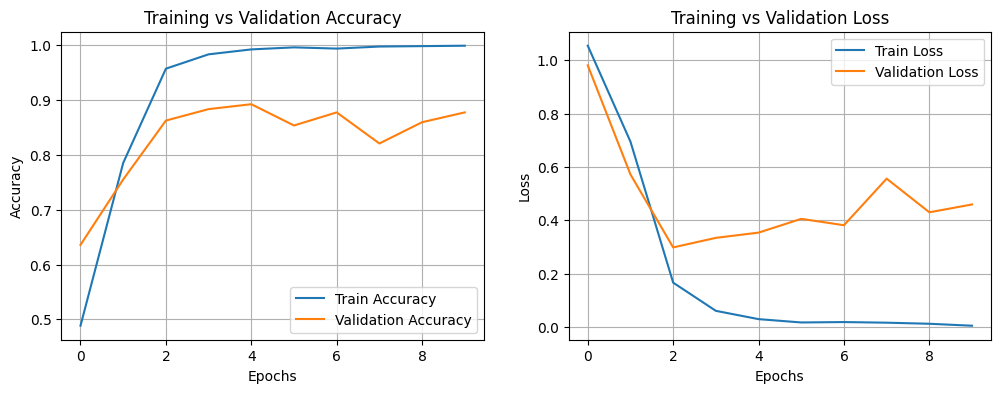

In [22]:
# Plot training vs validation accuracy and loss 
import matplotlib.pylab as plt
plt.figure(figsize=(12, 4)) 
# Plot accuracy 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Training vs Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.grid()
plt.legend() 
# Plot loss 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Training vs Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.grid()
plt.show()

In [21]:
model.evaluate(X_test, Y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8521 - loss: 0.5626


[0.6066807508468628, 0.8343834280967712]

## 